In [126]:
# Import pandas
import pandas as pd

# Load the dataset
file_path = "Burger_reviews_combined_tripadvisor_googlereview_finalized.csv"
df = pd.read_csv(file_path)

# Show available columns
print("Available columns:", df.columns.tolist())


Available columns: ['place_name', 'tokenized']


In [128]:
pd.set_option('display.max_colwidth', None)  # Set to None for unlimited width

print(df)

             place_name  \
0            Mean Mince   
1            Mean Mince   
2            Mean Mince   
3            Mean Mince   
4            Mean Mince   
...                 ...   
1121      Spades Burger   
1122      Spades Burger   
1123      Spades Burger   
1124      Spades Burger   
1125  Woodfire Kl @ttdi   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [130]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [132]:
# Function to calculate VADER sentiment scores
def vader_sentiment(text):
    return analyzer.polarity_scores(text)

# Apply VADER sentiment analysis to the 'tokenized' column and store the results
vader_scores = df['tokenized'].apply(vader_sentiment)

# Expand the dictionary returned by VADER into separate columns
df_vader = pd.json_normalize(vader_scores)

In [134]:
# Add the original 'place_name' and 'tokenized' columns
df_vader['place_name'] = df['place_name']
df_vader['tokenized'] = df['tokenized']

In [136]:
# Assign sentiment labels based on the compound score
def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['sentiment_label'] = df_vader['compound'].apply(get_sentiment_label)

In [138]:
df_vader['sentiment_label'] = df_vader['compound'].apply(get_sentiment_label)

# Reorder the columns to match the desired order
df_vader = df_vader[['place_name', 'tokenized', 'compound', 'pos', 'neu', 'neg', 'sentiment_label']]

In [140]:
# Show a preview of the results
print(df_vader[['place_name', 'tokenized', 'compound', 'pos', 'neu', 'neg', 'sentiment_label']].head())

   place_name  \
0  Mean Mince   
1  Mean Mince   
2  Mean Mince   
3  Mean Mince   
4  Mean Mince   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

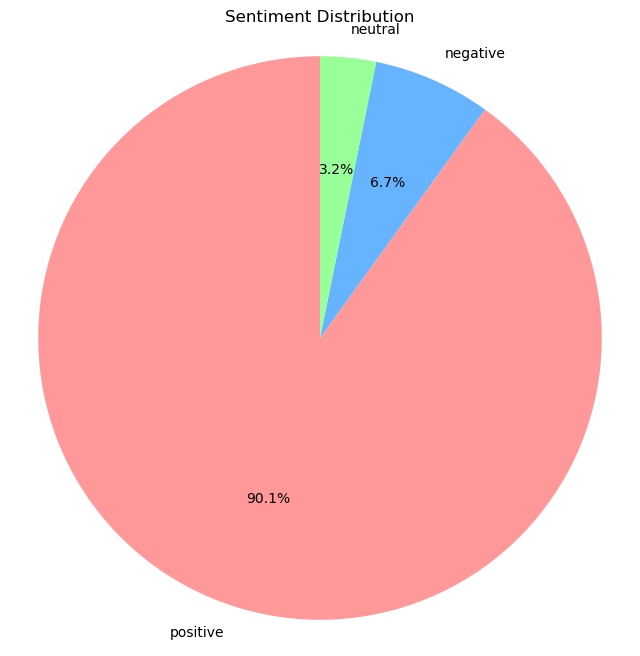

In [142]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Pie chart for sentiment distribution
sentiment_counts = df_vader['sentiment_label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.title("Sentiment Distribution")
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [146]:
# Export the DataFrame to a new CSV file
output_file_path = "sentiment_analysis_reviews.csv"
df_vader.to_csv(output_file_path, index=False)

print(f"File saved as {output_file_path}")


File saved as sentiment_analysis_reviews.csv
